In [6]:
pip install numpy==1.23.5

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-surprise==1.1.0

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset and add the decade column by performing a join operation.

In [5]:
# Define the path to your local dataset directory
dataset_path = "../data/ml-100k"

# Load ratings data (assumes the file is 'u.data' in the ml-100k folder)
df_ratings = pd.read_csv(f"{dataset_path}/u.data", sep='\t', header=None, 
                         names=['user_id', 'item_id', 'rating', 'timestamp'])

# Convert item_id to integer
df_ratings['item_id'] = df_ratings['item_id'].astype(int)

# Define movie metadata columns based on u.item structure
movie_columns = ['item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL',
                 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Load movie metadata from local u.item file
df_movies = pd.read_csv(f"{dataset_path}/u.item", sep='|', encoding='latin-1',
                        names=movie_columns, usecols=['item_id', 'release_date'])

# Convert item_id in df_movies to int
df_movies['item_id'] = df_movies['item_id'].astype(int)

# Merge ratings with movie release dates
df_final = pd.merge(df_ratings, df_movies, on='item_id', how='left')

# Drop timestamp as it's not needed
df_final.drop(columns=['timestamp'], inplace=True)

# Convert release_date to datetime, handling missing values
df_final['release_date'] = pd.to_datetime(df_final['release_date'], errors='coerce')

# Extract the year from release_date
df_final['year'] = df_final['release_date'].dt.year

# Create a new column 'decade' by rounding down the year to the nearest decade
df_final['decade'] = (df_final['year'] // 10) * 10

# Drop the 'year' and 'release_date' columns as they're no longer needed
df_final.drop(columns=['year', 'release_date'], inplace=True)

# Display the first few rows of the final DataFrame
print(df_final.head())

   user_id  item_id  rating  decade
0      196      242       3  1990.0
1      186      302       3  1990.0
2       22      377       1  1990.0
3      244       51       2  1990.0
4      166      346       1  1990.0


In [6]:
# Save the df_final dataset as a CSV file in the current directory
df_final.to_csv("../preprocessing/df_final.csv", index=False)

### Data analyis

In [8]:
# Select 10 random unique users from the dataset
random_users = np.random.choice(df_final['user_id'].unique(), 200, replace=False)

# Count how many movies each user watched
user_movie_counts = df_final[df_final['user_id'].isin(random_users)].groupby('user_id')['item_id'].count()

# Convert to DataFrame for better display
df_final_user_movie_counts = user_movie_counts.reset_index()
df_final_user_movie_counts.columns = ['user_id', '# movies watched']

# Display the result
print("Random Users Movie Count:")
print(df_final_user_movie_counts.max())

Random Users Movie Count:
user_id             937
# movies watched    493
dtype: int64


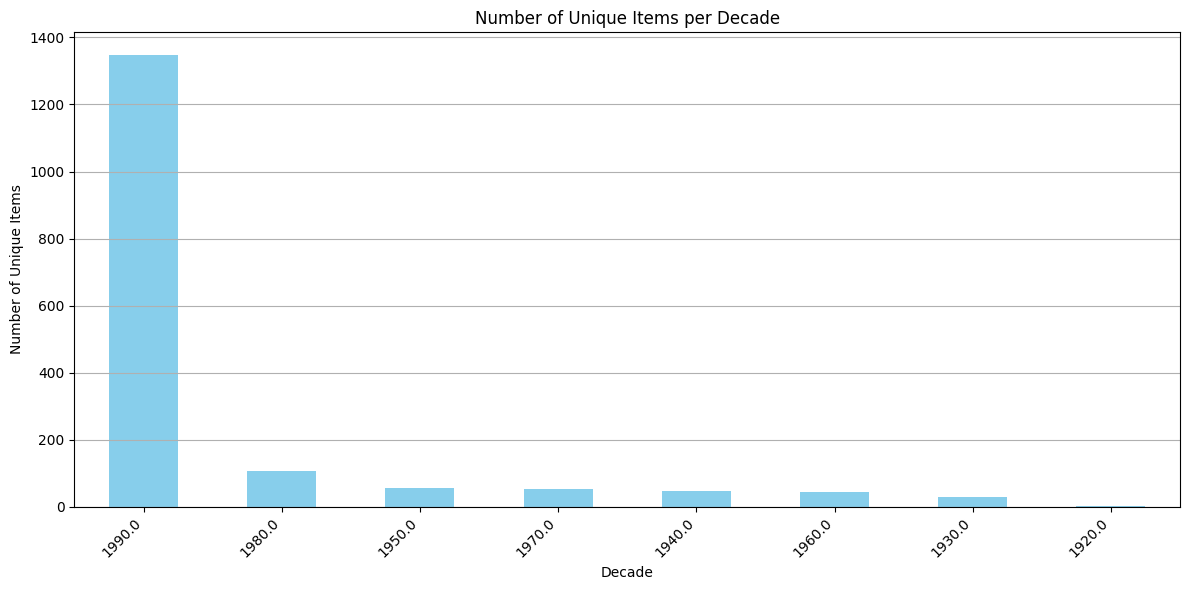


🔍 Missing Value Report:
Missing ratings: 0
Missing user IDs: 0
Missing decades: 9
Missing item IDs: 0

🧾 Number of duplicate rows: 0

📊 Total rows: 100000
✅ Non-null ratings: 100000
✔️ All rows have a rating.

📌 Dataset Summary:
Unique users: 943
Unique items: 1682
Unique decades: 8
Average ratings per user: 106.04
Min ratings per user: 20
Max ratings per user: 737


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_final  # Assign df_final to df for consistency in code

# ========== User & Item Statistics ==========
unique_users = df['user_id'].nunique()
unique_items = df['item_id'].nunique()
ratings_per_user = df.groupby('user_id').size()
average_ratings_per_user = ratings_per_user.mean()
min_ratings_per_user = ratings_per_user.min()
max_ratings_per_user = ratings_per_user.max()

# ========== Decade Statistics ==========
unique_decades = df['decade'].nunique()
items_per_decade = df.groupby('decade')['item_id'].nunique().sort_values(ascending=False)

# ========== Plot: Items per Decade ==========
plt.figure(figsize=(12, 6))
items_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Items per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Unique Items')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# ========== Missing Values ==========
missing_values = {
    "Missing ratings": df['rating'].isnull().sum(),
    "Missing user IDs": df['user_id'].isnull().sum(),
    "Missing decades": df['decade'].isnull().sum(),
    "Missing item IDs": df['item_id'].isnull().sum()
}

print("\n🔍 Missing Value Report:")
for key, val in missing_values.items():
    print(f"{key}: {val}")

# ========== Duplicate Rows ==========
duplicate_rows = df.duplicated().sum()
print(f"\n🧾 Number of duplicate rows: {duplicate_rows}")

# ========== Ratings Info ==========
total_rows = len(df)
non_null_ratings = df['rating'].notnull().sum()
print(f"\n📊 Total rows: {total_rows}")
print(f"✅ Non-null ratings: {non_null_ratings}")

if total_rows == non_null_ratings:
    print("✔️ All rows have a rating.")
else:
    print("⚠️ Some rows are missing a rating.")

# ========== Summary ==========
print("\n📌 Dataset Summary:")
print(f"Unique users: {unique_users}")
print(f"Unique items: {unique_items}")
print(f"Unique decades: {unique_decades}")
print(f"Average ratings per user: {average_ratings_per_user:.2f}")
print(f"Min ratings per user: {min_ratings_per_user}")
print(f"Max ratings per user: {max_ratings_per_user}")


In [14]:
import pandas as pd

# Step 1: Count number of unique decades per user
decade_counts = df_final.groupby('user_id')['decade'].nunique()

# Step 2: Filter users who rated movies from 3 or more decades
qualified_users = decade_counts[decade_counts >= 3].index

# Step 3: Randomly select 10 such users
sample_users = pd.Series(qualified_users).sample(10, random_state=42)

# Step 4: Filter the dataset for selected users
sample_df = df_final[df_final['user_id'].isin(sample_users)]

# Step 5: Create a pivot table (user_id × decade → rating)
pivot_df = sample_df.pivot_table(
    index='user_id',
    columns='decade',
    values='rating',
    aggfunc='first'  # Take the first rating per user-decade
)

# Step 6: Sort columns (decades)
pivot_df = pivot_df.reindex(sorted(pivot_df.columns), axis=1)

# Step 7: Print result
print(pivot_df)


decade   1920.0  1930.0  1940.0  1950.0  1960.0  1970.0  1980.0  1990.0
user_id                                                                
114         NaN     2.0     4.0     3.0     3.0     5.0     5.0     4.0
216         NaN     NaN     5.0     3.0     2.0     4.0     4.0     3.0
239         5.0     5.0     5.0     5.0     5.0     5.0     5.0     4.0
244         NaN     NaN     NaN     3.0     3.0     4.0     3.0     2.0
316         NaN     4.0     4.0     2.0     4.0     1.0     5.0     5.0
340         NaN     5.0     NaN     5.0     4.0     5.0     4.0     5.0
387         NaN     3.0     4.0     4.0     4.0     4.0     4.0     3.0
734         NaN     4.0     5.0     2.0     4.0     4.0     4.0     4.0
756         NaN     3.0     3.0     5.0     2.0     3.0     3.0     3.0
790         NaN     NaN     3.0     2.0     2.0     4.0     2.0     4.0


Counting Movies Per Decade

In [53]:
# Extract unique decades
unique_decades = df_final['decade'].dropna().unique()
unique_user_ids = df_final['user_id'].nunique()

# len(unique_user_ids)  # or
# df_final['user_id'].nunique()

# Extract unique item_ids and count total movies
existing_item_ids = df_final['item_id'].unique()
total_movies = df_final['item_id'].nunique()

# Extract the last user ID in df_final and define a starting point for new users
max_existing_user_id = df_final['user_id'].max()
#min_existing_user_id = df_final['user_id'].min()
num_new_users = 40
new_user_start_id = max_existing_user_id + 1

# Count movies per decade
movies_per_decade = df_final.groupby('decade')['item_id'].nunique().reset_index(name='movie_count')
print("Unique Decades Available:", unique_decades)
print("Unique User IDs:", unique_user_ids)
print("Total Unique Movies Available:", total_movies)
print("Starting User ID for New Users:", new_user_start_id)
print("\nMovies Per Decade:")
print(movies_per_decade)
print("\n")
print("Columns:", df_final.columns)

Unique Decades Available: [1990. 1960. 1970. 1950. 1980. 1940. 1930. 1920.]
Unique User IDs: 943
Total Unique Movies Available: 1682
Starting User ID for New Users: 944

Movies Per Decade:
   decade  movie_count
0  1920.0            2
1  1930.0           29
2  1940.0           45
3  1950.0           54
4  1960.0           43
5  1970.0           53
6  1980.0          107
7  1990.0         1348


Columns: Index(['user_id', 'item_id', 'rating', 'decade'], dtype='object')


In [ ]:
df_final[df_final['user_id']==1]

## Computation of user-decade diversity and clustering

In [15]:
# Step 1: Count number of ratings per user per decade
user_decade_counts = df_final.groupby(['user_id', 'decade']).size().unstack(fill_value=0)

# Step 2: Normalize counts so each user's row sums to 1
user_decade_normalized = user_decade_counts.div(user_decade_counts.sum(axis=1), axis=0)

# Step 3: Rename columns to indicate normalization
user_decade_normalized.columns = [f'{int(c)}_norm' for c in user_decade_normalized.columns]

# Step 4: Merge raw counts with normalized values
user_decade_merged = pd.concat([user_decade_counts, user_decade_normalized], axis=1).reset_index()

# Step 5: Preview the result
#print(user_decade_merged.head())
user_decade_merged


,user_id,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,1920_norm,1930_norm,1940_norm,1950_norm,1960_norm,1970_norm,1980_norm,1990_norm
0,1,0,4,1,3,9,18,44,192,0.0,0.014760,0.003690,0.011070,0.033210,0.066421,0.162362,0.708487
1,2,0,0,0,0,0,2,0,60,0.0,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.967742
2,3,0,0,0,0,0,0,0,54,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,4,0,0,0,0,0,2,1,21,0.0,0.000000,0.000000,0.000000,0.000000,0.083333,0.041667,0.875000
4,5,0,2,3,6,9,20,32,102,0.0,0.011494,0.017241,0.034483,0.051724,0.114943,0.183908,0.586207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,0,0,0,0,0,1,0,48,0.0,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.979592
939,940,0,1,0,3,3,8,28,64,0.0,0.009346,0.000000,0.028037,0.028037,0.074766,0.261682,0.598131
940,941,0,0,0,0,0,0,0,22,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
941,942,0,3,7,6,9,5,11,38,0.0,0.037975,0.088608,0.075949,0.113924,0.063291,0.139241,0.481013


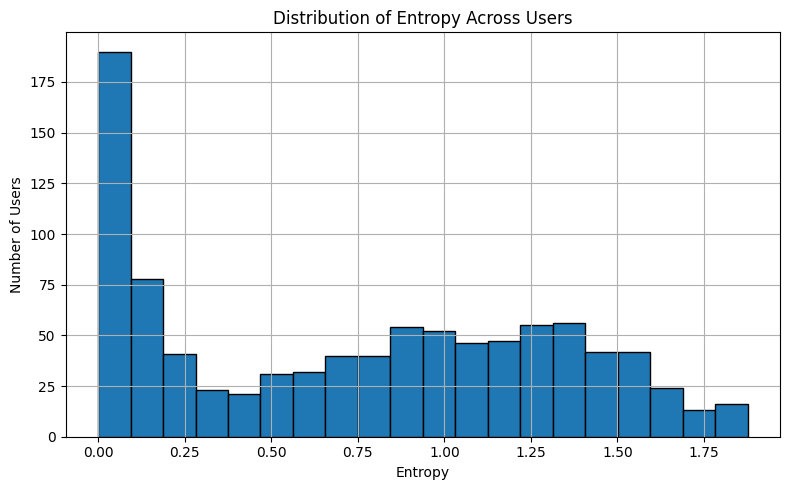

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy

# ===== Step 1: Count how many movies each user rated in each decade =====
user_decade_counts = df_final.groupby(['user_id', 'decade']).size().unstack(fill_value=0)

# ===== Step 2: Normalize the counts so each user's row sums to 1 (i.e., distribution over decades) =====
user_decade_normalized = user_decade_counts.div(user_decade_counts.sum(axis=1), axis=0)
user_decade_normalized.columns = [f'{int(c)}_norm' for c in user_decade_normalized.columns]

# ===== Step 3: Calculate entropy for each user to measure diversity of preferences =====
user_entropy = user_decade_normalized.apply(lambda x: entropy(x), axis=1).to_frame(name='entropy')
user_entropy.reset_index(inplace=True)

# ===== Step 4: Quantile-Based Clustering =====
user_entropy_sorted = user_entropy.sort_values(by='entropy').reset_index(drop=True)
n_users = len(user_entropy_sorted)

user_entropy_sorted['cluster'] = pd.cut(
    user_entropy_sorted.index,
    bins=[-1, n_users // 3, 2 * n_users // 3, n_users],
    labels=[0, 1, 2]
).astype(int)

# ===== Step 5: Save entropy with cluster assignment =====
user_entropy_sorted.to_csv("../preprocessing/user_entropy.csv", index=False)

# ===== Step 6: Merge clustering results with original counts =====
merged_quantile = pd.merge(user_decade_counts.reset_index(), user_entropy_sorted, on='user_id')

# ===== Step 7: Sort by cluster before saving =====
merged_quantile_sorted = merged_quantile.sort_values(by='cluster')
merged_quantile_sorted.to_csv("user_clusters_quantile.csv", index=False)

# ===== Step 8: Plot histogram of entropy values =====
plt.figure(figsize=(8, 5))
plt.hist(user_entropy_sorted['entropy'], bins=20, edgecolor='black')
plt.title('Distribution of Entropy Across Users')
plt.xlabel('Entropy')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# ===== Step 1: Count how many movies each user rated in each decade =====
user_decade_counts = df_final.groupby(['user_id', 'decade']).size().unstack(fill_value=0)

# ===== Step 2: Normalize the counts so each user's row sums to 1 (i.e., distribution over decades) =====
user_decade_normalized = user_decade_counts.div(user_decade_counts.sum(axis=1), axis=0)
user_decade_normalized.columns = [f'{int(c)}_norm' for c in user_decade_normalized.columns]

# ===== Step 3: Combine raw counts and normalized values into one DataFrame =====
user_decade_merged = pd.concat([user_decade_counts, user_decade_normalized], axis=1).reset_index()

# ===== Step 4: Calculate entropy for each user to measure diversity of preferences across decades =====
user_entropy = user_decade_normalized.apply(lambda x: entropy(x), axis=1).to_frame(name='entropy')
user_entropy.reset_index(inplace=True)

# ===== Step 5: Sort users by entropy and assign quantile-based clusters =====
user_entropy_sorted = user_entropy.sort_values(by='entropy').reset_index(drop=True)
n_users = len(user_entropy_sorted)

# Assign cluster based on position
user_entropy_sorted['cluster'] = pd.cut(
    user_entropy_sorted.index,
    bins=[-1, n_users // 3, 2 * n_users // 3, n_users],
    labels=[0, 1, 2]
).astype(int)

# ===== Step 6: Merge decade counts with entropy and cluster assignments =====
merged_result_with_cluster = pd.merge(
    user_decade_counts.reset_index(),  # raw decade counts
    user_entropy_sorted[['user_id', 'entropy', 'cluster']],  # entropy + cluster
    on='user_id'
)

# ===== Step 7: Sort final result by entropy for inspection =====
merged_result_with_user = merged_result_with_cluster.sort_values(by='entropy')

# Optional: Save or inspect
merged_result_with_user.to_csv("user_user_clusters_quantile.csv", index=False)

# # Display preview
merged_result_with_user.head()

,user_id,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,entropy,cluster
543,544,0,0,0,0,0,0,0,31,0.0,0
800,801,0,0,0,0,0,0,0,26,0.0,0
204,205,0,0,0,0,0,0,0,22,0.0,0
205,206,0,0,0,0,0,0,0,64,0.0,0
571,572,0,0,0,0,0,0,0,20,0.0,0


user segmentation based on rating diversity across movie decades.

In [20]:
merged_quantile_sorted[merged_quantile_sorted['user_id'] == 568]

,user_id,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,entropy,cluster
567,568,0,12,10,11,10,6,10,22,1.8756,2


In [21]:
# Get the row with the maximum entropy
user_entropy.loc[user_entropy['entropy'].idxmax()]


user_id    568.0000
entropy      1.8756
Name: 567, dtype: float64

In [22]:
import pandas as pd

# Load the quantile-clustered user entropy file
quantile_df = pd.read_csv("user_clusters_quantile.csv")

# Step 1: Find row with maximum entropy
max_row = quantile_df.loc[quantile_df['entropy'].idxmax()]
print("🔺 Max Entropy:")
print(f"Entropy: {max_row['entropy']:.4f}, User ID: {max_row['user_id']}, Cluster: {max_row['cluster']}")

# Step 2: Find row with minimum entropy
min_row = quantile_df.loc[quantile_df['entropy'].idxmin()]
print("\n🔻 Min Entropy:")
print(f"Entropy: {min_row['entropy']:.4f}, User ID: {min_row['user_id']}, Cluster: {min_row['cluster']}")

# Step 3: Create df_cluster with only user_id and cluster
df_cluster = quantile_df[['user_id', 'cluster']].copy()


🔺 Max Entropy:
Entropy: 1.8756, User ID: 568.0, Cluster: 2.0

🔻 Min Entropy:
Entropy: 0.0000, User ID: 229.0, Cluster: 0.0


✅ df_cluster.csv and individual cluster files saved successfully.

🔍 Entropy Range per Cluster:
Cluster 0 → Min Entropy: 0.0000, Max Entropy: 0.2954
Cluster 1 → Min Entropy: 0.3027, Max Entropy: 1.0947
Cluster 2 → Min Entropy: 1.0948, Max Entropy: 1.8756

📊 Cluster Distribution:
Cluster 0: 315 users (33.40%) out of 943
Cluster 1: 314 users (33.30%) out of 943
Cluster 2: 314 users (33.30%) out of 943


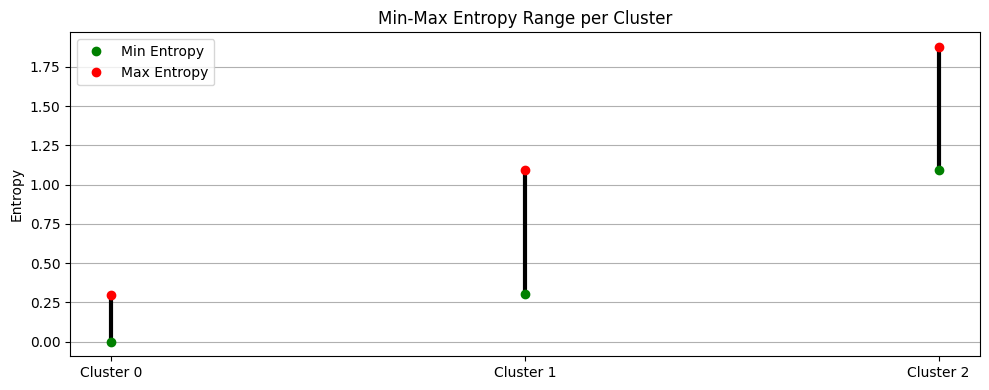

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Prepare df_cluster and split by cluster ===
df_cluster = user_entropy_sorted[['user_id', 'cluster', 'entropy']].copy()

cluster0 = df_cluster[df_cluster['cluster'] == 0]
cluster1 = df_cluster[df_cluster['cluster'] == 1]
cluster2 = df_cluster[df_cluster['cluster'] == 2]

# === Step 2: Save clusters to CSV ===
df_cluster.to_csv("df_cluster.csv", index=False)
cluster0.to_csv("../preprocessing/cluster_0_users.csv", index=False)
cluster1.to_csv("../preprocessing/cluster_1_users.csv", index=False)
cluster2.to_csv("../preprocessing/cluster_2_users.csv", index=False)

print("✅ df_cluster.csv and individual cluster files saved successfully.")

# === Step 3: Compute min and max entropy per cluster ===
min_entropy = [cluster0['entropy'].min(), cluster1['entropy'].min(), cluster2['entropy'].min()]
max_entropy = [cluster0['entropy'].max(), cluster1['entropy'].max(), cluster2['entropy'].max()]

# === Step 4: Print entropy ranges ===
print("\n🔍 Entropy Range per Cluster:")
for i, (min_val, max_val) in enumerate(zip(min_entropy, max_entropy)):
    print(f"Cluster {i} → Min Entropy: {min_val:.4f}, Max Entropy: {max_val:.4f}")

# === Step 5: Print cluster size and percentages ===
total_users = len(df_cluster)
print("\n📊 Cluster Distribution:")
for i, cluster_df in enumerate([cluster0, cluster1, cluster2]):
    count = len(cluster_df)
    percent = (count / total_users) * 100
    print(f"Cluster {i}: {count} users ({percent:.2f}%) out of {total_users}")

# === Step 6: Plot min-max entropy per cluster ===
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
fig, ax = plt.subplots(figsize=(10, 4))

for i, (min_val, max_val) in enumerate(zip(min_entropy, max_entropy)):
    ax.plot([i, i], [min_val, max_val], color='black', linewidth=3)
    ax.plot(i, min_val, 'go', label='Min Entropy' if i == 0 else "")
    ax.plot(i, max_val, 'ro', label='Max Entropy' if i == 0 else "")

# Customize plot
ax.set_xticks(range(len(clusters)))
ax.set_xticklabels(clusters)
ax.set_ylabel("Entropy")
ax.set_title("Min-Max Entropy Range per Cluster")
ax.grid(True, axis='y')
ax.legend()

plt.tight_layout()
plt.show()


# 1980

In [ ]:
import pandas as pd

# Assume df_final is already loaded
df_original = df_final.copy()

# Get unique 1980s movie IDs
movies_1980s = df_original[df_original['decade'] == 1980.0]['item_id'].unique()
num_movies_1980 = len(movies_1980s)

# Function to generate fictitious users
def generate_fictitious_users(start_user_id, num_users, movies, decade=1980.0, rating=5):
    rows = []
    for user_id in range(start_user_id, start_user_id + num_users):
        for item_id in movies:
            rows.append({
                'user_id': user_id,
                'item_id': item_id,
                'rating': rating,
                'decade': decade
            })
    return pd.DataFrame(rows)

# Fictitious user group sizes
fictitious_counts = [40, 80, 120]

# Original max user_id to increment from
original_max_user_id = df_original['user_id'].max()

# Loop through each group and save separately
for count in fictitious_counts:
    start_user_id = original_max_user_id + 1
    new_users_df = generate_fictitious_users(start_user_id, count, movies_1980s)
    
    df_extended = pd.concat([df_original, new_users_df], ignore_index=True)
    
    print(f"\n=== {count} Fictitious Users Added ===")
    print(f"Start user_id: {start_user_id}")
    print(f"End user_id: {start_user_id + count - 1}")
    print(f"Datapoints added: {len(new_users_df)} (Expected: {count * num_movies_1980})")
    
    # Save the result
    df_extended.to_csv(f"../preprocessing/df_{count}_1980.csv", index=False)



=== 40 Fictitious Users Added ===
Start user_id: 944
End user_id: 983
Datapoints added: 4280 (Expected: 4280)

=== 80 Fictitious Users Added ===
Start user_id: 944
End user_id: 1023
Datapoints added: 8560 (Expected: 8560)

=== 120 Fictitious Users Added ===
Start user_id: 944
End user_id: 1063
Datapoints added: 12840 (Expected: 12840)


In [27]:
df_40_1980 = pd.read_csv("../preprocessing/df_40_1980.csv")
df_80_1980 = pd.read_csv("../preprocessing/df_80_1980.csv")
df_120_1980 = pd.read_csv("../preprocessing/df_120_1980.csv")

In [ ]:
unique_user_ids = sorted(df_40_1980['user_id'].unique())
print(unique_user_ids)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [ ]:
filtered_df = df_40_1980[df_40_1980['user_id'] >= 943]
print(filtered_df)
#filtered_df.to_csv("../preprocessing/df_40_1980_filtered.csv", index=False)

        user_id  item_id  rating  decade
67416       943       58       4  1990.0
67571       943      111       4  1990.0
67673       943       11       4  1990.0
67975       943      570       1  1990.0
68024       943      232       4  1980.0
...         ...      ...     ...     ...
104275      983     1569       5  1980.0
104276      983     1583       5  1980.0
104277      983     1572       5  1980.0
104278      983     1635       5  1980.0
104279      983     1546       5  1980.0

[4448 rows x 4 columns]


In [28]:
# Filter for users with user_id >= 943
filtered_df = df_80_1980[df_80_1980['user_id'] >= 933]

# Group by user_id and count the number of ratings (i.e., movie entries)
ratings_per_user = filtered_df.groupby('user_id')['item_id'].count().reset_index(name='num_movies_rated')

# Print the result
print(ratings_per_user)


    user_id  num_movies_rated
0       933               184
1       934               174
2       935                39
3       936               142
4       937                40
..      ...               ...
86     1019               107
87     1020               107
88     1021               107
89     1022               107
90     1023               107

[91 rows x 2 columns]


# 1990

In [4]:
import pandas as pd

# Assume df_final is already loaded
df_original = df_final.copy()

# Get unique 1990s movie IDs
movies_1990s = df_original[df_original['decade'] == 1990.0]['item_id'].unique()
num_movies_1990 = len(movies_1990s)

# Function to generate fictitious users
def generate_fictitious_users(start_user_id, num_users, movies, decade=1990.0, rating=5):
    rows = []
    for user_id in range(start_user_id, start_user_id + num_users):
        for item_id in movies:
            rows.append({
                'user_id': user_id,
                'item_id': item_id,
                'rating': rating,
                'decade': decade
            })
    return pd.DataFrame(rows)

# Fictitious user group sizes
fictitious_counts = [40, 80, 120]

# Original max user_id to increment from
original_max_user_id = df_original['user_id'].max()

# Loop through each group and save separately
for count in fictitious_counts:
    start_user_id = original_max_user_id + 1
    new_users_df = generate_fictitious_users(start_user_id, count, movies_1990s)
    
    df_extended = pd.concat([df_original, new_users_df], ignore_index=True)
    
    print(f"\n=== {count} Fictitious Users Added ===")
    print(f"Start user_id: {start_user_id}")
    print(f"End user_id: {start_user_id + count - 1}")
    print(f"Datapoints added: {len(new_users_df)} (Expected: {count * num_movies_1990})")
    
    # Save the result
    df_extended.to_csv(f"../preprocessing/df_{count}_1990.csv", index=False)



=== 40 Fictitious Users Added ===
Start user_id: 944
End user_id: 983
Datapoints added: 53920 (Expected: 53920)

=== 80 Fictitious Users Added ===
Start user_id: 944
End user_id: 1023
Datapoints added: 107840 (Expected: 107840)

=== 120 Fictitious Users Added ===
Start user_id: 944
End user_id: 1063
Datapoints added: 161760 (Expected: 161760)


In [13]:
import pandas as pd

# Assume df_final is already loaded
df_original = df_final.copy()

# Step 1 — Analyze the data

# Remove NaN decades
unique_decades = df_original['decade'].dropna().unique()
unique_decades.sort()

print(f"\n✅ You have {len(unique_decades)} decades: {unique_decades}")

# Count unique movies for each decade
movies_per_decade = {}
for decade in unique_decades:
    movies = df_original[df_original['decade'] == decade]['item_id'].unique()
    movies_per_decade[decade] = movies
    print(f"Decade {int(decade)} : {len(movies)} movies")

# Count unique users
unique_users = df_original['user_id'].nunique()
print(f"\n✅ You have {unique_users} unique users in the original dataset.")

# Step 2 — Define fictitious user generator function
def generate_fictitious_users(start_user_id, num_users, movies, decade, rating=5):
    rows = []
    for user_id in range(start_user_id, start_user_id + num_users):
        for item_id in movies:
            rows.append({
                'user_id': user_id,
                'item_id': item_id,
                'rating': rating,
                'decade': decade
            })
    return pd.DataFrame(rows)

# Fictitious user group sizes
fictitious_counts = [40, 80, 120]

# Get current max user_id
original_max_user_id = df_original['user_id'].max()

# Step 3 — Loop through decades & generate synthetic users
for decade in unique_decades:
    movies = movies_per_decade[decade]
    num_movies = len(movies)
    
    for count in fictitious_counts:
        # ⚠️ Always generate from original_max_user_id (so datasets are independent)
        start_user_id = original_max_user_id + 1
        new_users_df = generate_fictitious_users(start_user_id, count, movies, decade)
        expected_rows = count * num_movies

        # Validity check
        actual_rows = len(new_users_df)
        valid = (actual_rows == expected_rows)
        status = "✅ VALID" if valid else "❌ INVALID"
        
        # Print summary
        print(f"\n=== Decade {int(decade)} | {count} Fictitious Users Added ===")
        print(f"Start user_id: {start_user_id}")
        print(f"End user_id: {start_user_id + count - 1}")
        print(f"Movies in decade: {num_movies}")
        print(f"Datapoints added: {actual_rows} (Expected: {expected_rows}) -> {status}")

        # Always start from original dataset for each count
        df_extended = pd.concat([df_original, new_users_df], ignore_index=True)

        # Save
        decade_str = str(int(decade))
        df_extended.to_csv(f"../preprocessing/df_{count}_{decade_str}.csv", index=False)



✅ You have 8 decades: [1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990.]
Decade 1920 : 2 movies
Decade 1930 : 29 movies
Decade 1940 : 45 movies
Decade 1950 : 54 movies
Decade 1960 : 43 movies
Decade 1970 : 53 movies
Decade 1980 : 107 movies
Decade 1990 : 1348 movies

✅ You have 943 unique users in the original dataset.

=== Decade 1920 | 40 Fictitious Users Added ===
Start user_id: 944
End user_id: 983
Movies in decade: 2
Datapoints added: 80 (Expected: 80) -> ✅ VALID

=== Decade 1920 | 80 Fictitious Users Added ===
Start user_id: 944
End user_id: 1023
Movies in decade: 2
Datapoints added: 160 (Expected: 160) -> ✅ VALID

=== Decade 1920 | 120 Fictitious Users Added ===
Start user_id: 944
End user_id: 1063
Movies in decade: 2
Datapoints added: 240 (Expected: 240) -> ✅ VALID

=== Decade 1930 | 40 Fictitious Users Added ===
Start user_id: 944
End user_id: 983
Movies in decade: 29
Datapoints added: 1160 (Expected: 1160) -> ✅ VALID

=== Decade 1930 | 80 Fictitious Users Added ===
Start user

In [14]:
import pandas as pd

def sanity_check(poisoned_df, original_df, decade_target, num_synthetic_users, poisoned_label="poisoned"):
    """
    Validate synthetic poisoning dataset.
    
    Arguments:
        poisoned_df: The full poisoned dataset
        original_df: The original dataset
        decade_target: e.g. 1980.0
        num_synthetic_users: e.g. 40, 80, 120
        poisoned_label: label for printing
    """
    print(f"\n🧪 Sanity Check for {poisoned_label} Poisoned Dataset")
    
    # User ID ranges
    max_orig_user_id = original_df['user_id'].max()
    min_poison_user_id = poisoned_df['user_id'].min()
    max_poison_user_id = poisoned_df['user_id'].max()
    
    print(f"Original max user_id: {max_orig_user_id}")
    print(f"Poisoned min user_id: {min_poison_user_id}")
    print(f"Poisoned max user_id: {max_poison_user_id}")
    
    # Synthetic user count check
    total_users_orig = original_df['user_id'].nunique()
    total_users_poison = poisoned_df['user_id'].nunique()
    synthetic_user_count = total_users_poison - total_users_orig
    print(f"Expected synthetic users: {num_synthetic_users}")
    print(f"Actual synthetic users: {synthetic_user_count}")
    
    # Identify synthetic users
    synthetic_users = poisoned_df[poisoned_df['user_id'] > max_orig_user_id]
    
    # Verify decades
    decade_counts = synthetic_users['decade'].value_counts()
    print("\nDecade distribution for synthetic users:")
    print(decade_counts)
    
    # Verify correct decade only
    if len(decade_counts) == 1 and decade_target in decade_counts.index:
        print("✅ Correct decade injected.")
    else:
        print("❌ WARNING: Unexpected decades found!")
    
    # Verify ratings
    rating_counts = synthetic_users['rating'].value_counts()
    print("\nRating distribution for synthetic users:")
    print(rating_counts)
    
    if len(rating_counts) == 1 and 5 in rating_counts.index:
        print("✅ Correct rating applied.")
    else:
        print("❌ WARNING: Unexpected ratings found!")
    
    # Verify total rows match expectation
    num_movies_in_decade = original_df[original_df['decade'] == decade_target]['item_id'].nunique()
    expected_total_rows = len(original_df) + num_synthetic_users * num_movies_in_decade
    actual_total_rows = len(poisoned_df)
    
    print(f"\nExpected total rows: {expected_total_rows}")
    print(f"Actual total rows: {actual_total_rows}")
    
    if expected_total_rows == actual_total_rows:
        print("✅ Row count matches expectation.")
    else:
        print("❌ WARNING: Row count mismatch!")

# === Example usage ===

# Load your original dataset (df_final)
df_final = pd.read_csv('../preprocessing/df_final.csv')

# Load one poisoned dataset (example 1980, 40 users)
df_40_1980 = pd.read_csv('../preprocessing/df_40_1980.csv')

# Run sanity check
sanity_check(df_40_1980, df_final, decade_target=1980.0, num_synthetic_users=40, poisoned_label="1980-40")

# Repeat for all your other poisoned datasets (80, 120, etc.)



🧪 Sanity Check for 1980-40 Poisoned Dataset
Original max user_id: 943
Poisoned min user_id: 1
Poisoned max user_id: 983
Expected synthetic users: 40
Actual synthetic users: 40

Decade distribution for synthetic users:
decade
1980.0    4280
Name: count, dtype: int64
✅ Correct decade injected.

Rating distribution for synthetic users:
rating
5    4280
Name: count, dtype: int64
✅ Correct rating applied.

Expected total rows: 104280
Actual total rows: 104280
✅ Row count matches expectation.


In [10]:
import matplotlib.pyplot as plt

# Prepare histogram data
plt.figure(figsize=(10, 6))

plt.hist(valid['overlap_p40'], bins=10, alpha=0.7, label='Poison 40')
plt.hist(valid['overlap_p80'], bins=10, alpha=0.7, label='Poison 80')
plt.hist(valid['overlap_p120'], bins=10, alpha=0.7, label='Poison 120')

plt.xlabel("Per-User Overlap (1980s movies)")
plt.ylabel("Number of Users")
plt.title("Distribution of 1980s Overlap Per User")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


TypeError: 'bool' object is not subscriptable

<Figure size 1000x600 with 0 Axes>